# Remapping degenerated network

When modelling wild type and degenerated networks, we want to be able to both remove and add synapses due to changes in dendritic and axonal morphologies. The synapses that are on unchanged branches should remain the same, removed branches will have their synapses removed, while added branches will get new synapses.

Preparation. 
Create a wild type network using Snudda.
Recreate the same network but with the modified morphologies (e.g. Parkinson's disease degenerated SPN dendrites, and growing FS axons).

Run this notebook on the two created networks.

In [1]:
original_network = "TEST1-PD0"
updated_network = "TEST1-PD2"
output_network =  "TEST1-PD2-final"

import os

original_network_file = os.path.join(original_network, "network-synapses.hdf5")
updated_network_file = os.path.join(updated_network, "network-synapses.hdf5")
output_network_file =  os.path.join(output_network, "network-synapses.hdf5")

original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/Bo2022/PD0"
updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/Bo2022/PD2"

original_input_file = os.path.join(original_network, "input-spikes.hdf5")
updated_input_file = os.path.join(updated_network, "input-spikes.hdf5")



In [2]:
from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=original_network_file,
                                             updated_network_file=updated_network_file,
                                             output_network_file=output_network_file,
                                             original_snudda_data_dir=original_snudda_data_dir,
                                             updated_snudda_data_dir=updated_snudda_data_dir,
                                             original_input_file=original_input_file,
                                             updated_input_file=updated_input_file)

Loading 96 neurons with 6179 synapses and 0 gap junctions
Loading 96 neurons with 2134 synapses and 0 gap junctions


In [3]:
import cProfile
prof_file = "whysoslow.profile"
cProfile.runctx("swap.write_new_network_file()", None, locals(), filename=prof_file)
# swap.write_new_network_file()
swap.close()

Writing new network to TEST1-PD2-final/network-synapses.hdf5
6179 / 6179
Processing neuron 0
Running post degeneration pruning of synapses
3344 / 3344
Post pruning. Keeping 2297/3344 (68.690%)
Keeping 2297 out of 6179 synapses (37.174 %)
0 / 0
Keeping 0 out of 0 gap junctions (0.000 %)


In [4]:
import pstats
from pstats import SortKey
p = pstats.Stats(prof_file)
p.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats(100)

Tue Sep 27 09:18:36 2022    whysoslow.profile

         841488 function calls (831247 primitive calls) in 1.519 seconds

   Ordered by: cumulative time
   List reduced from 297 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.519    1.519 {built-in method builtins.exec}
        1    0.000    0.000    1.519    1.519 <string>:1(<module>)
        1    0.012    0.012    1.519    1.519 swap_to_degenerated_morphologies.py:68(write_new_network_file)
        1    0.004    0.004    1.354    1.354 swap_to_degenerated_morphologies_extended.py:159(filter_synapses)
     1821    0.019    0.000    0.809    0.000 swap_to_degenerated_morphologies.py:283(filter_synapses_helper)
     1821    0.062    0.000    0.732    0.000 swap_to_degenerated_morphologies.py:313(filter_axonal_synapses_helper)
     1307    0.017    0.000    0.588    0.000 swap_to_degenerated_morphologies.py:228(get_morphology)
        1    0.014    0

# TODO:

- We need to double check morphologies. Is there a mismatch between PD0 and PD2 cases?

- Also plot input locations to double check correct.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/Bo2022/PD0 from TEST1-PD0/network-config.json
Loading 96 neurons with 6179 synapses and 0 gap junctions
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/Bo2022/PD2 from TEST1-PD2-final/network-synapses.hdf5
Loading 96 neurons with 2297 synapses and 0 gap junctions
Plotting 325 external synapses
Synapse coordinates mismatch [[0.00470934 0.00402313 0.007786  ]
 [0.00471834 0.00401413 0.007777  ]
 [0.00477234 0.00399913 0.007804  ]
 [0.00470934 0.00404413 0.007804  ]
 [0.00471234 0.00402013 0.007777  ]] vs [[0.00473077 0.00401893 0.00773835]
 [0.0047313  0.00401161 0.00774499]
 [0.00473827 0.00394784 0.00774822]
 [0.00473189 0.00402867 0.00772545]
 [0.00473112 0.00401342 0.00774161]] (distances [5.24148748e-05 3.46246147e-05 8.30793000e-05 8.31710669e-05
 4.06163270e-05] with allowed max_dist = 1e-05)
Figure written: TEST1-PD2-final/figures/input-to-1-dSPN_2-and-internal-synapses.png


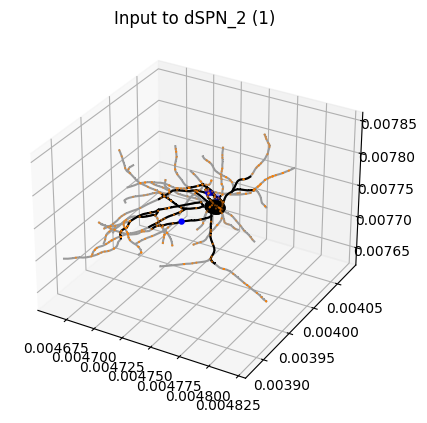

In [5]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=original_network,
                      degenerated_network_path=output_network)
plot_neuron_id = 1
pd.plot_neuron(neuron_id=plot_neuron_id)

In [6]:
!snudda_load TEST1-PD0/network-synapses.hdf5 --listPre 10

Loading 96 neurons with 6179 synapses and 0 gap junctions
List neurons pre-synaptic to neuronID = 10 (dSPN_1)
The neuron receives 26 synapses
4 : iSPN_3 (3 synapses)
17 : dSPN_1 (2 synapses)
33 : dSPN_1 (3 synapses)
41 : dSPN_3 (2 synapses)
42 : iSPN_1 (3 synapses)
54 : iSPN_3 (4 synapses)
60 : dSPN_1 (3 synapses)
63 : dSPN_2 (3 synapses)
76 : dSPN_1 (3 synapses)


In [7]:
!snudda_load /TEST1-PD2/network-synapses.hdf5 --listPre 10

Traceback (most recent call last):
  File "/home/hjorth/HBP/Snudda/venv/bin/snudda_load", line 33, in <module>
    sys.exit(load_entry_point('snudda', 'console_scripts', 'snudda_load')())
  File "/home/hjorth/HBP/Snudda/snudda/utils/load.py", line 973, in snudda_load_cli
    nl = SnuddaLoad(args.networkFile, load_synapses=load_synapses)
  File "/home/hjorth/HBP/Snudda/snudda/utils/load.py", line 51, in __init__
    self.data = self.load_hdf5(network_file, load_synapses)
  File "/home/hjorth/HBP/Snudda/snudda/utils/load.py", line 176, in load_hdf5
    f = h5py.File(network_file, 'r')
  File "/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/h5py/_hl/files.py", line 533, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/h5py/_hl/files.py", line 226, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5p

In [8]:
!snudda_load TEST1-PD2-final/network-synapses.hdf5 --listPre 10

Loading 96 neurons with 2297 synapses and 0 gap junctions
List neurons pre-synaptic to neuronID = 10 (dSPN_1)
The neuron receives 9 synapses
33 : dSPN_1 (4 synapses)
63 : dSPN_2 (2 synapses)
86 : dSPN_3 (3 synapses)


Loading 96 neurons with 6179 synapses and 0 gap junctions
Loading 96 neurons with 2297 synapses and 0 gap junctions
Added: 15, removed: 165, kept: 22


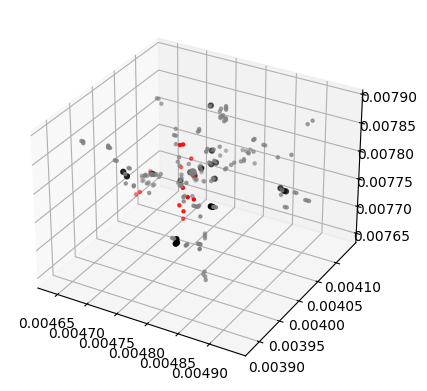

(<Figure size 640x480 with 1 Axes>, <Axes3DSubplot:>)

In [9]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=original_network, degenerated_network_path=output_network, neuron_id=2)
pdg.plot_synapses()